<a href="https://colab.research.google.com/github/pollymelo/Ciencia_Basico/blob/main/Oficina5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Como você poderia usar os fundamentos da estatística para obter insights com base nos dados de tempo de espera nas filas e na satisfação dos clientes? Quais técnicas estatísticas, como medidas de tendência central, dispersão, correlação e regressão, você pode utilizar para identificar padrões e relações significativas que ajudem a melhorar a experiência do cliente?

In [44]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
import scipy
from scipy.special import factorial
import numpy as np
import matplotlib.pyplot as plt


# Criando dados aleatórios a partir de um dicionário
clientes = [
    {"id": 1, "tempo_espera": 5, "satisfacao": 5},
    {"id": 2, "tempo_espera": 12, "satisfacao": 3},
    {"id": 3, "tempo_espera": 3, "satisfacao": 5},
    {"id": 4, "tempo_espera": 20, "satisfacao": 2},
    {"id": 5, "tempo_espera": 7, "satisfacao": 4},
    {"id": 6, "tempo_espera": 15, "satisfacao": 3},
    {"id": 7, "tempo_espera": 2, "satisfacao": 5},
    {"id": 8, "tempo_espera": 30, "satisfacao": 1},
    {"id": 9, "tempo_espera": 9, "satisfacao": 4},
    {"id": 10, "tempo_espera": 25, "satisfacao": 2}
]

# Transformando em DataFrame
df_clientes = pd.DataFrame(clientes)

# Criando um arquivo csv
df_clientes.to_csv("clientes.csv", index=False)


In [45]:
# Calcular a média de satisfação
media_satisfacao = df_clientes["satisfacao"].mean(axis=0)
print(f"A média de satisfação é {media_satisfacao}")

# Calcular a média de tempo de espera
media_tempo = df_clientes["tempo_espera"].mean(axis=0)
print(f"A média de tempo de espera é {media_tempo}")

A média de satisfação é 3.4
A média de tempo de espera é 12.8


In [46]:
# Calcular a mediana da satisfação do cliente
mediana_satisfacao = df_clientes["satisfacao"].median(axis=0)
print(f"A mediana da satisfação é {mediana_satisfacao}")

# Calcular a mediana do tempo de espera
mediana_tempo = df_clientes["tempo_espera"].median(axis=0)
print(f"A mediana do tempo de espera é {mediana_tempo}")

A mediana da satisfação é 3.5
A mediana do tempo de espera é 10.5


In [47]:
# Calcular a moda da satisfação do cliente
moda_satisfacao = df_clientes["satisfacao"].mode()
print(f"A moda da satisfação é {moda_satisfacao.iloc[0]}")

# Não há moda no tempo de espera

A moda da satisfação é 5


In [48]:
# Medidas de tendência central e dispersão de satisfação do cliente
medidas_satisfacao = df_clientes['satisfacao'].describe(percentiles=None, include=None, exclude=None)
print(medidas_satisfacao)

count    10.000000
mean      3.400000
std       1.429841
min       1.000000
25%       2.250000
50%       3.500000
75%       4.750000
max       5.000000
Name: satisfacao, dtype: float64


In [49]:
# Medidas de tendência central e dispersão de tempo de espera dos clientes
medidas_tempo = df_clientes['tempo_espera'].describe(percentiles=None, include=None, exclude=None)
print(medidas_tempo)

count    10.000000
mean     12.800000
std       9.566144
min       2.000000
25%       5.500000
50%      10.500000
75%      18.750000
max      30.000000
Name: tempo_espera, dtype: float64


In [50]:
# Regressão
Y = df_clientes['tempo_espera']
X = df_clientes['satisfacao']
X = sm.add_constant(df_clientes['satisfacao'])

resultado_regressao = sm.OLS(Y, X).fit()
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:           tempo_espera   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     163.7
Date:                Tue, 06 May 2025   Prob (F-statistic):           1.31e-06
Time:                        17:32:09   Log-Likelihood:                -20.914
No. Observations:                  10   AIC:                             45.83
Df Residuals:                       8   BIC:                             46.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.0109      1.869     18.731      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [51]:
# Obtendo as previsões dentro da amostra
df_clientes['Y_previsto'] = resultado_regressao.predict()
df_clientes

,id,tempo_espera,satisfacao,Y_previsto
0,1,5,5,2.347826
1,2,12,3,15.413043
2,3,3,5,2.347826
3,4,20,2,21.945652
4,5,7,4,8.880435
5,6,15,3,15.413043
6,7,2,5,2.347826
7,8,30,1,28.478261
8,9,9,4,8.880435
9,10,25,2,21.945652


In [52]:
# Correlação
correlacao = df_clientes.corr()
print(correlacao)

                    id  tempo_espera  satisfacao  Y_previsto
id            1.000000      0.475704   -0.410662    0.410662
tempo_espera  0.475704      1.000000   -0.976422    0.976422
satisfacao   -0.410662     -0.976422    1.000000   -1.000000
Y_previsto    0.410662      0.976422   -1.000000    1.000000


Como você identificaria outliers nos dados de tempo de espera e satisfação dos clientes? Que impacto esses outliers podem ter na análise estatística e quais decisões você tomaria para lidar com eles?

In [53]:
# Calcular o desvio padrão de satisfação dos clientes (resultado homogêneo)
desvio_satisfacao = np.std(df_clientes["satisfacao"])
print(f"O desvio padrão da satisfação é {desvio_satisfacao}")

# Calcular o desvio padrão do tempo de espera dos clientes (resultado heterogêneo)
desvio_tempo = np.std(df_clientes["tempo_espera"])
print(f"O desvio padrão da satisfação é {desvio_tempo}")

O desvio padrão da satisfação é 1.3564659966250538
O desvio padrão da satisfação é 9.075241043630742


In [54]:
# Calcular o Z-score da satisfação dos clientes
z_satisfacao = ((df_clientes["satisfacao"]) - np.mean(df_clientes["satisfacao"])) / np.std(df_clientes["satisfacao"])
z_satisfacao

# Calcular o Z-score do tempo de espera
z_tempo = ((df_clientes["tempo_espera"]) - np.mean(df_clientes["tempo_espera"])) / np.std(df_clientes["tempo_espera"])
z_tempo


,tempo_espera
0,-0.859481
1,-0.088152
2,-1.079861
3,0.793367
4,-0.639101
5,0.242418
6,-1.190051
7,1.895266
8,-0.418722
9,1.344317


In [55]:
# Adicionar os Z-scores ao DataFrame
df_clientes["z_satisfacao"] = z_satisfacao
df_clientes["z_tempo"] = z_tempo

# Gráfico de dispersão usando os Z-scores
sns.scatterplot(x="z_satisfacao", y="z_tempo_espera", data=df_clientes)
plt.xlabel("Z-score da Satisfação")
plt.ylabel("Z-score do Tempo de Espera")
plt.title("Dispersão Padronizada entre Satisfação e Tempo de Espera")
plt.show()

ValueError: Could not interpret value `z_tempo_espera` for `y`. An entry with this name does not appear in `data`.

In [56]:
# Calcular o método do desvio absoluto mediano da satisfação dos clientes
mdam_satisfacao = ((df_clientes["satisfacao"]) - np.median(df_clientes["satisfacao"])) / np.median(np.abs(np.std(df_clientes["satisfacao"])))
mdam_satisfacao

# Calcular o método do desvio absoluto mediano do tempo de espera
mdam_tempo = ((df_clientes["tempo_espera"]) - np.median(df_clientes["tempo_espera"])) / np.median(np.abs(np.std(df_clientes["tempo_espera"])))
mdam_tempo

,tempo_espera
0,-0.606045
1,0.165285
2,-0.826424
3,1.046804
4,-0.385665
5,0.495855
6,-0.936614
7,2.148703
8,-0.165285
9,1.597754


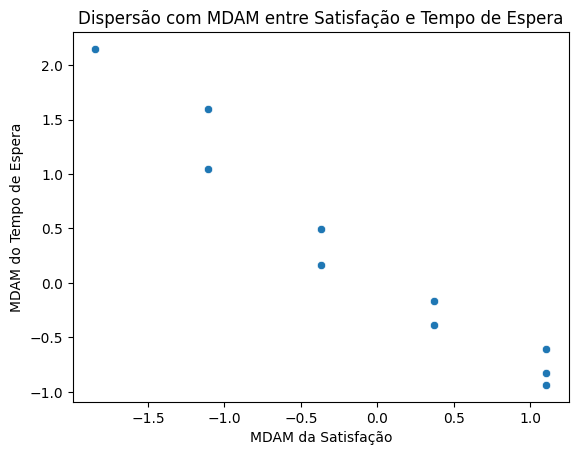

In [57]:
# Adicionar os MDAM ao DataFrame
df_clientes["mdam_satisfacao"] = mdam_satisfacao
df_clientes["mdam_tempo_espera"] = mdam_tempo

# Gráfico de dispersão usando o MDAM
sns.scatterplot(x="mdam_satisfacao", y="mdam_tempo_espera", data=df_clientes)
plt.xlabel("MDAM da Satisfação")
plt.ylabel("MDAM do Tempo de Espera")
plt.title("Dispersão com MDAM entre Satisfação e Tempo de Espera")
plt.show()

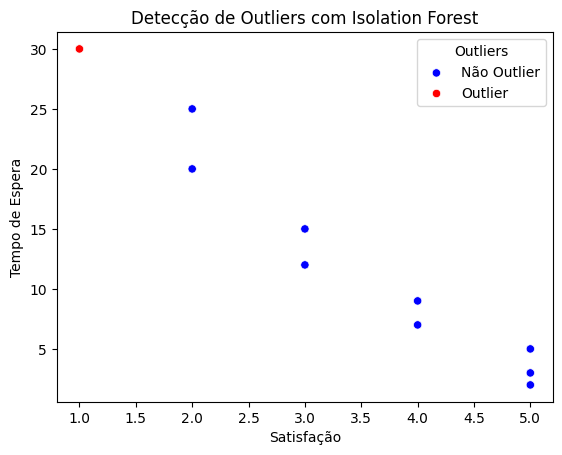

In [58]:
from sklearn.ensemble import IsolationForest

ifr = IsolationForest(contamination=0.05)
data = df_clientes[["satisfacao", "tempo_espera"]]
ifr.fit(data)
out = ifr.predict(data)


# Adicionar os resultados da previsão (outliers) ao DataFrame
df_clientes["outlier"] = out

# Gráfico de dispersão com diferenciação de outliers
sns.scatterplot(x="satisfacao", y="tempo_espera", hue="outlier", palette={1: 'blue', -1: 'red'}, data=df_clientes)
plt.xlabel("Satisfação")
plt.ylabel("Tempo de Espera")
plt.title("Detecção de Outliers com Isolation Forest")
plt.legend(title="Outliers", labels=["Não Outlier", "Outlier"])
plt.show()

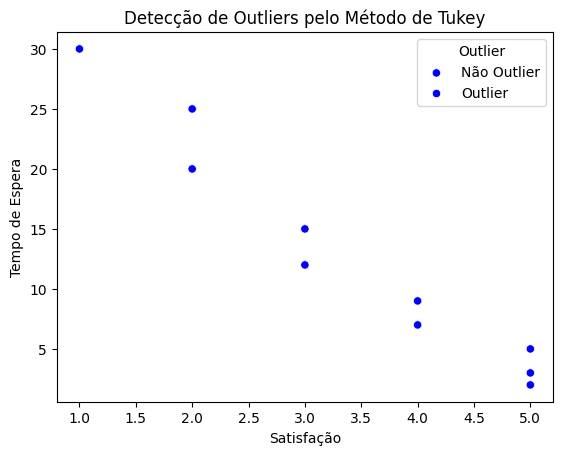

In [62]:
# Método de Turkey
q3 = df_clientes["tempo_espera"].quantile(0.75)
q1 = df_clientes["tempo_espera"].quantile(0.25)

iqr = q3 - q1

limite_superior = q3 + (1.5 * iqr)
limite_inferior = q1 - (1.5 * iqr)

idx = np.where((df_clientes["tempo_espera"] < limite_inferior) | (df_clientes["tempo_espera"] > limite_superior))

# Identificar outliers com base no método de Tukey
df_clientes["outlier_tukey"] = ((df_clientes["tempo_espera"] < limite_inferior) |
                                (df_clientes["tempo_espera"] > limite_superior))

# Gráfico
sns.scatterplot(x="satisfacao", y="tempo_espera", hue="outlier_tukey", palette={False: "blue", True: "red"}, data=df_clientes)
plt.xlabel("Satisfação")
plt.ylabel("Tempo de Espera")
plt.title("Detecção de Outliers pelo Método de Tukey")
plt.legend(title="Outlier", labels=["Não Outlier", "Outlier"])
plt.show()


In [69]:
from sklearn.impute import KNNImputer

# Tratando Outliers
# Garantir que o índice seja datetime
df_clientes.index = pd.to_datetime(df_clientes.index)

# Criar cópia para evitar modificar original diretamente
df_corrigido = df_clientes.copy()

# Loop por hora e trimestre
for h in df_corrigido.index.hour.unique():
    for q in df_corrigido.index.quarter.unique():

        # Filtrar os dados da hora e trimestre atuais
        mask = (df_corrigido.index.hour == h) & (df_corrigido.index.quarter == q)
        aux = df_corrigido.loc[mask].copy()

        if aux.empty:
            continue  # Pula se não houver dados para esse grupo

        # Calcular limites de Tukey
        q1 = aux["tempo_espera"].quantile(0.25)
        q3 = aux["tempo_espera"].quantile(0.75)
        iqr = q3 - q1
        limite_inferior = q1 - (1.5 * iqr)
        limite_superior = q3 + (1.5 * iqr)

        # Substituir outliers por NaN
        outlier_mask = (aux["tempo_espera"] < limite_inferior) | (aux["tempo_espera"] > limite_superior)
        aux.loc[outlier_mask, "tempo_espera"] = np.nan

        # Aplicar KNN Imputer (apenas colunas numéricas)
        imputer = KNNImputer(n_neighbors=15, weights='uniform', metric='nan_euclidean')
        aux_imputed = imputer.fit_transform(aux.select_dtypes(include=[np.number]))

        # Substituir os valores imputados no DataFrame original
        aux.loc[:, aux.select_dtypes(include=[np.number]).columns] = aux_imputed
        df_corrigido.loc[mask] = aux

# Substitui o df original, se desejar
df_clientes = df_corrigido

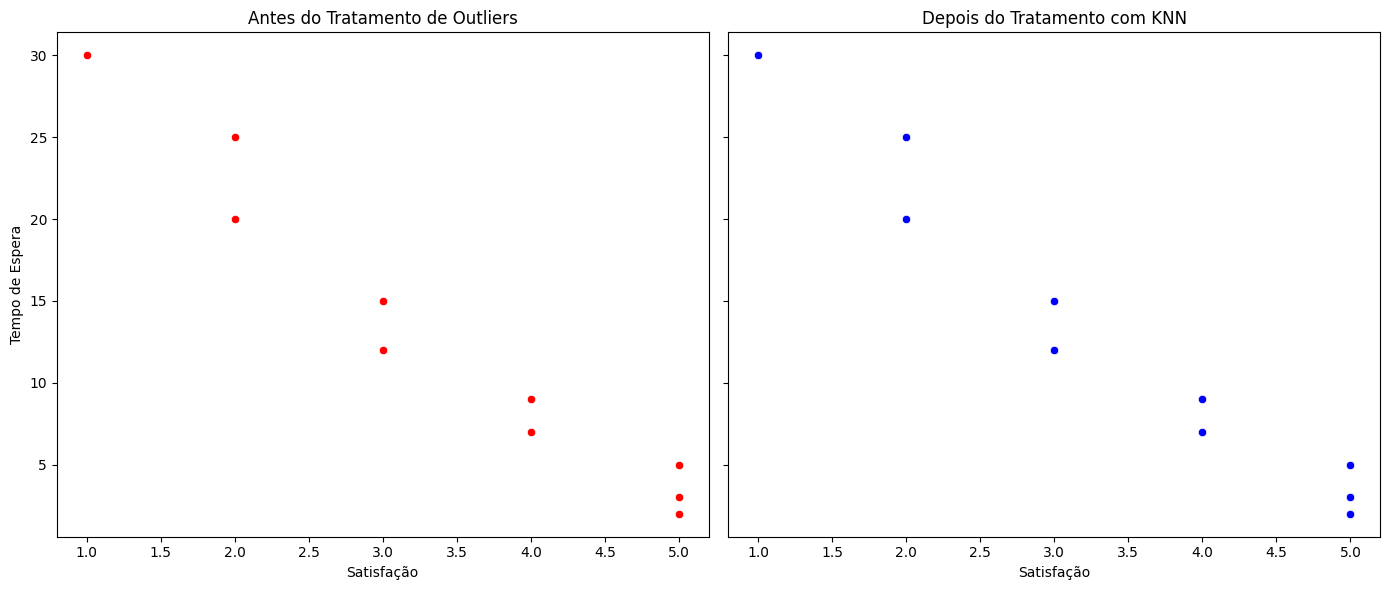

In [71]:
# Gráfico do Outlier tratado
# Salvar cópia dos dados originais antes do tratamento
df_original = df_clientes.copy()

# Gráfico de comparação antes e depois do tratamento
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# Antes do tratamento
sns.scatterplot(ax=axes[0], x="satisfacao", y="tempo_espera", data=df_original, color="red")
axes[0].set_title("Antes do Tratamento de Outliers")
axes[0].set_xlabel("Satisfação")
axes[0].set_ylabel("Tempo de Espera")

# Depois do tratamento
sns.scatterplot(ax=axes[1], x="satisfacao", y="tempo_espera", data=df_clientes, color="blue")
axes[1].set_title("Depois do Tratamento com KNN")
axes[1].set_xlabel("Satisfação")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

Suponha que a rede de supermercados implemente uma nova política de atendimento em algumas lojas. Como você utilizaria a estatística para comparar o tempo de espera e a satisfação dos clientes entre as lojas com a nova política e as lojas com a política antiga?

In [ ]:
# Novo dicionário que será utilizado para as comparações
clientes = [
    {"id": 1, "tempo_espera": 3, "satisfacao": 5},
    {"id": 2, "tempo_espera": 7, "satisfacao": 4},
    {"id": 3, "tempo_espera": 2, "satisfacao": 5},
    {"id": 4, "tempo_espera": 10, "satisfacao": 3},
    {"id": 5, "tempo_espera": 4, "satisfacao": 5},
    {"id": 6, "tempo_espera": 6, "satisfacao": 4},
    {"id": 7, "tempo_espera": 1, "satisfacao": 5},
    {"id": 8, "tempo_espera": 12, "satisfacao": 2},
    {"id": 9, "tempo_espera": 5, "satisfacao": 4},
    {"id": 10, "tempo_espera": 8, "satisfacao": 3}
]

df_outra_loja = pd.DataFrame(clientes)

In [ ]:
df_antigo = pd.DataFrame(df_clientes)
df_novo = pd.DataFrame(df_outra_loja)

In [ ]:
print("Média do tempo de espera Loja 1:", df_antigo["tempo_espera"].mean())
print("Média do tempo de espera Loja 2:", df_novo["tempo_espera"].mean())

print("Média da satisfação Loja 1:", df_antigo["satisfacao"].mean())
print("Média da satisfação Loja 2:", df_novo["satisfacao"].mean())

Média do tempo de espera Loja 1: 12.8
Média do tempo de espera Loja 2: 5.8
Média da satisfação Loja 1: 3.4
Média da satisfação Loja 2: 4.0


Como você poderia calcular a probabilidade de um cliente esperar mais de 10 minutos na fila, baseado nos dados históricos?

In [ ]:
minutos =  df_clientes[df_clientes['tempo_espera'] >= 10]
probabilidade = len(minutos) / len(df_clientes)
print(f"A probabilidade de um cliente esperar mais de 10 minutos é na Loja 1 {probabilidade:.2f}")

minutos_outra_loja =  df_outra_loja[df_outra_loja['tempo_espera'] >= 10]
probabilidade_outra_loja = len(minutos_outra_loja) / len(df_outra_loja)
print(f"A probabilidade de um cliente esperar mais de 10 minutos é na Loja 2 {probabilidade_outra_loja:.2f}")

A probabilidade de um cliente esperar mais de 10 minutos é na Loja 1 0.50
A probabilidade de um cliente esperar mais de 10 minutos é na Loja 2 0.20
